<h1>Uvod</h1>
Odabrao sam temu Analiza unosa kofeina na trajanje i kvalitetu sna jer je kofein široko rasprostranjen u svakodnevnoj prehrani, a često se konzumira bez razmišljanja o njegovom utjecaju na san. Budući da san ima ključnu ulogu u zdravlju i funkcioniranju organizma, važno je istražiti kako unos kofeina može utjecati na njegovu kvalitetu i trajanje. 
Podaci o snu učitavaju se iz CSV datoteke, koja je preuzeta s platforme Kaggle, u Pandas DataFrame, što omogućuje jednostavnu obradu i analizu podataka [1], [3].
Podaci o unosu kofeina učitavaju se iz JSON datoteke generirane pomoću online alata za generiranje testnih podataka [2]. Koristio sam uglavnom materijale s kolegija za izradu projekta uz korištenje umjetne inteligencije (ChatGPT).

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


Na početku se učitavaju biblioteke koje su potrebne za rad s podacima, crtanje grafova i spremanje podataka u bazu. Sve daljnje analize temelje se na ovim alatima.

In [43]:
sleep_df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Podaci o snu učitavaju se iz CSV datoteke u Pandas DataFrame. Prikaz prvih nekoliko redaka služi za brzu provjeru da su podaci ispravno učitani.

In [44]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Ovdje se provjerava struktura skupa podataka, broj zapisa i tipovi stupaca kako bi se lakše razumjelo s kakvim se podacima radi.

In [45]:
caffeine_df = pd.read_json("caffeine_intake.json")
caffeine_df.head()

,person_id,date,time,caffeine_mg,source
0,42,2023-01-30,7:56,185,Energy Drink
1,366,2023-01-15,11:56,115,Energy Drink
2,204,2023-03-19,16:02,38,Coffee
3,54,2023-10-18,13:15,78,Tea
4,57,2023-01-04,7:19,40,Cola


Učitavaju se podaci o unosu kofeina iz JSON datoteke, čime se koristi drugi izvor podataka drugačijeg formata, što je jedan od zahtjeva projekta.

In [46]:
caffeine_df["date"] = pd.to_datetime(caffeine_df["date"])

Datum se pretvara u odgovarajući format kako bi se kasnije mogla napraviti vremenska analiza i zbrajanje unosa kofeina po danima.

In [47]:
daily_caffeine = (
    caffeine_df
    .groupby(["person_id", "date"])["caffeine_mg"]
    .sum()
    .reset_index()
)

daily_caffeine.head()


,person_id,date,caffeine_mg
0,1,2023-02-12,104
1,1,2023-10-08,104
2,1,2023-10-23,246
3,2,2023-07-17,61
4,2,2023-07-24,232


Unos kofeina se zbraja po osobi i danu kako bi se dobila ukupna dnevna količina kofeina za svakog ispitanika.

In [48]:
def caffeine_level(mg):
    if mg < 100:
        return "Low"
    elif mg <= 200:
        return "Medium"
    else:
        return "High"

daily_caffeine["caffeine_level"] = daily_caffeine["caffeine_mg"].apply(caffeine_level)
daily_caffeine.head()


,person_id,date,caffeine_mg,caffeine_level
0,1,2023-02-12,104,Medium
1,1,2023-10-08,104,Medium
2,1,2023-10-23,246,High
3,2,2023-07-17,61,Low
4,2,2023-07-24,232,High


Definira se jednostavna funkcija koja razvrstava unos kofeina u tri razine, što olakšava usporedbu rezultata.
Na temelju ukupnog dnevnog unosa, svakoj osobi dodjeljuje se razina unosa kofeina.

In [49]:
sleep_df = sleep_df.rename(columns={"Person ID": "person_id"})

Naziv stupca se prilagođava kako bi se podaci o snu mogli povezati s podacima o unosu kofeina.

In [50]:
merged_df = pd.merge(
    sleep_df,
    daily_caffeine,
    on="person_id",
    how="inner"
)
merged_df.head()

,person_id,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,date,caffeine_mg,caffeine_level
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,2023-02-12,104,Medium
1,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,2023-10-08,104,Medium
2,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,2023-10-23,246,High
3,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,2023-07-17,61,Low
4,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,2023-07-24,232,High


Podaci o snu i kofeinu spajaju se u jedan zajednički skup podataka koji se dalje koristi za analizu.

In [51]:
sleep_by_caffeine = (
    merged_df
    .groupby("caffeine_level")["Sleep Duration"]
    .mean()
    .reset_index()
)

sleep_by_caffeine


,caffeine_level,Sleep Duration
0,High,7.129428
1,Low,7.200000
2,Medium,7.127507


Računa se prosječno trajanje sna za svaku razinu unosa kofeina kako bi se vidjelo postoje li razlike između skupina.

In [52]:
quality_by_caffeine = (
    merged_df
    .groupby("caffeine_level")["Quality of Sleep"]
    .mean()
    .reset_index()
)

quality_by_caffeine


,caffeine_level,Quality of Sleep
0,High,7.275204
1,Low,7.410714
2,Medium,7.292264


Na isti način se računa i prosječna kvaliteta sna za svaku razinu unosa kofeina.

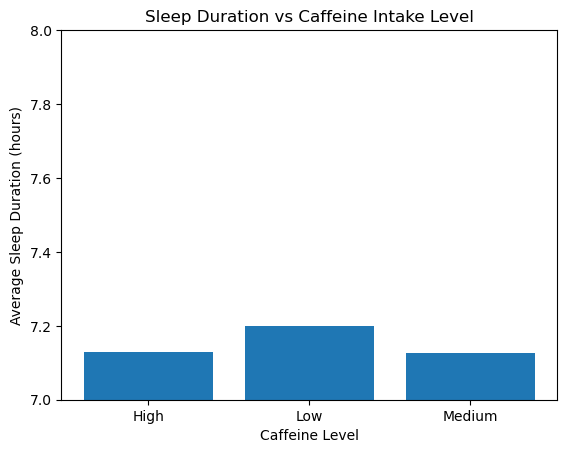

In [53]:
plt.figure()
plt.bar(
    sleep_by_caffeine["caffeine_level"],
    sleep_by_caffeine["Sleep Duration"]
)
plt.xlabel("Caffeine Level")
plt.ylabel("Average Sleep Duration (hours)")
plt.title("Sleep Duration vs Caffeine Intake Level")

plt.ylim(7, 8) 

plt.show()


Rezultati analize trajanja sna prikazuju se grafički kako bi se razlike između razina unosa kofeina lakše uočile.

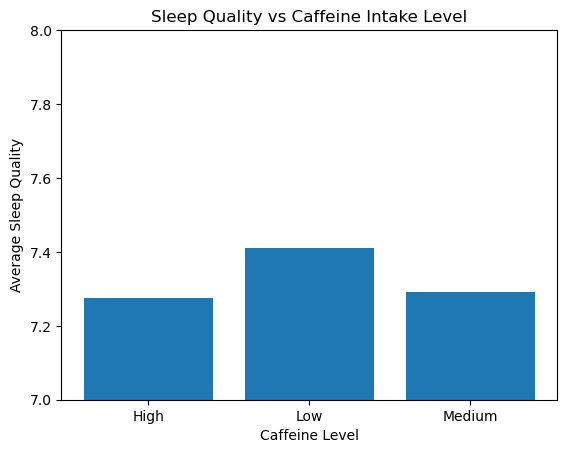

In [54]:
plt.figure()
plt.bar(
    quality_by_caffeine["caffeine_level"],
    quality_by_caffeine["Quality of Sleep"]
)
plt.xlabel("Caffeine Level")
plt.ylabel("Average Sleep Quality")
plt.title("Sleep Quality vs Caffeine Intake Level")
plt.ylim(7, 8)
plt.show()


Ovaj graf prikazuje odnos između unosa kofeina i kvalitete sna te omogućuje jednostavniju interpretaciju dobivenih rezultata.

In [55]:
engine = create_engine("sqlite:///sleep_caffeine.db")

In [56]:
sleep_df.to_sql("sleep_data", engine, if_exists="replace", index=False)
daily_caffeine.to_sql("caffeine_data", engine, if_exists="replace", index=False)
merged_df.to_sql("integrated_data", engine, if_exists="replace", index=False)


996

Podaci se spremaju u SQLite bazu podataka kako bi bili trajno dostupni za daljnji dohvat i analizu. Za komunikaciju s bazom koristi se SQLAlchemy biblioteka [4], a REST API je implementiran pomoću Flask okvira [5].

In [57]:
check = pd.read_sql("SELECT * FROM integrated_data LIMIT 5", engine)
check


,person_id,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,date,caffeine_mg,caffeine_level
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,2023-02-12 00:00:00.000000,104,Medium
1,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,2023-10-08 00:00:00.000000,104,Medium
2,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,2023-10-23 00:00:00.000000,246,High
3,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,2023-07-17 00:00:00.000000,61,Low
4,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,2023-07-24 00:00:00.000000,232,High


Dohvaćanjem nekoliko zapisa iz baze provjerava se jesu li integrirani podaci ispravno spremljeni.

In [58]:
from flask import Flask, jsonify
import pandas as pd
from sqlalchemy import create_engine

app = Flask(__name__)
engine = create_engine("sqlite:///sleep_caffeine.db")


Učitavaju se potrebne biblioteke za izradu REST API-ja. 
Postavlja se Flask aplikacija i povezuje s bazom podataka u kojoj se nalaze obrađeni podaci.

In [59]:
@app.route("/data", methods=["GET"])
def get_data():
    df = pd.read_sql("SELECT * FROM integrated_data", engine)
    return df.to_json(orient="records")


Ova ruta omogućuje dohvat svih integriranih podataka u JSON formatu. Pristupa se pomoću http://127.0.0.1:5000/data nakon pokretanja Flash aplikacije.

![http://127.0.0.1:5000/data](data.png)

In [60]:
@app.route("/analysis/sleep", methods=["GET"])
def get_sleep_analysis():
    df = pd.read_sql("""
        SELECT caffeine_level,
               AVG("Sleep Duration") AS avg_sleep
        FROM integrated_data
        GROUP BY caffeine_level
    """, engine)
    return df.to_json(orient="records")


Putem ove rute moguće je dohvatiti prosječno trajanje sna po razinama unosa kofeina. Pristupa se pomoću http://127.0.0.1:5000/analysis/sleep nakon pokretanja Flash aplikacije.

![http://127.0.0.1:5000/analysis/sleep](analysissleep.png)

In [61]:
@app.route("/analysis/quality", methods=["GET"])
def get_quality_analysis():
    df = pd.read_sql("""
        SELECT caffeine_level,
               AVG("Quality of Sleep") AS avg_quality
        FROM integrated_data
        GROUP BY caffeine_level
    """, engine)
    return df.to_json(orient="records")


Ova ruta vraća podatke o prosječnoj kvaliteti sna za svaku razinu unosa kofeina. Pristupa se pomoću http://127.0.0.1:5000/analysis/quality nakon pokretanja Flash aplikacije.

![http://127.0.0.1:5000/analysis/quality](analysisquality.png)

In [62]:
app.run(host="127.0.0.1", port=5000, debug=False, use_reloader=False, threaded=True)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


Na kraju se pokreće Flask aplikacija, čime rezultati analize postaju dostupni kroz REST API u web pregledniku.

<h1>Kritički osvrt</h1>
Projekt pokazuje da je moguće na jednostavan način povezati podatke iz različitih izvora i analizirati njihov međusobni odnos. Korišteni alati omogućuju relativno brzu obradu podataka, njihovu pohranu u bazu te dohvat rezultata putem REST API-ja, što je primjenjivo i u stvarnim aplikacijama. Takav pristup može se koristiti u sustavima za praćenje zdravlja ili životnih navika korisnika.

Ipak, potrebno je istaknuti da su podaci o unosu kofeina generirani, zbog čega rezultati ne odražavaju stvarne navike ispitanika. Također, nisu uzeti u obzir svi čimbenici koji mogu utjecati na san, poput vremena konzumacije kofeina ili individualnih razlika među osobama. Zbog toga rezultate treba promatrati kao ilustrativne, a ne kao potpuno pouzdane zaključke.
Tijekom izrade rada korišten je i alat generativne umjetne inteligencije za pomoć pri pisanju i razvoju koda [6].

<h1>Zaključak</h1>
U ovom projektu provedena je analiza utjecaja unosa kofeina na trajanje i kvalitetu sna korištenjem heterogenih izvora podataka. Podaci su uspješno integrirani, analizirani i vizualizirani, a rezultati su dostupni putem REST API-ja. Analiza je pokazala da postoje razlike u trajanju i kvaliteti sna između različitih razina unosa kofeina.

Iako korišteni podaci imaju određena ograničenja, projekt je uspješno ispunio zadani cilj i pokazao kako se mogu povezati različiti izvori podataka te koristiti za osnovnu analizu. Ovakav pristup predstavlja dobru osnovu za daljnji razvoj i primjenu uz korištenje stvarnih podataka.

<h3>Literatura</h3>
[1] U. M. of Manchester, Sleep Health and Lifestyle Dataset, Kaggle, 2023. Dostupno na: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data
 [Pristupljeno: siječanj 2026.].

[2] Generatedata, Generate Data Online Tool,  Dostupno na: https://generatedata.com
 [Pristupljeno: siječanj 2026.].

[3] Pandas dokumentacija, 2026.  Dostupno na: https://pandas.pydata.org/docs/. [Pristupljeno: siječanj 2026.].

[4] SQLAlchemy dokumentacija, 2026.  Dostupno na: https://docs.sqlalchemy.org/
 [Pristupljeno: siječanj 2026.].

[5] Pallets Projects, Flask dokumentacija, 2026.  Dostupno na: https://flask.palletsprojects.com/
 [Pristupljeno: siječanj 2026.].

[6] OpenAI, ChatGPT, Dostupno na: https://chatgpt.com/share/6972208b-03f0-8009-a395-3af65d9b4a29
 [Pristupljeno: siječanj 2026.].
